### Assignment's goal:

**Load**, **inspect** and **clean** the data. Split the data into a **training set** and a **validation set** and a **test set**. Use a simple **classifier as a baseline**. **Train various classifiers**. **Motivate your choice** in relation to the characteristics of the dataset. Try to combine them into an **ensemble learning model** that outperforms all of the others. Please see the attached excel-file for the specific grading matrix.

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *

In [4]:
# loading the data
df = pd.read_csv('./data/parkinsons.data')

In [5]:
# inspecting the data
empty_values = df.isna().sum().sum()
print("Dataframe's shape:", df.shape)
print("Amount of empty values:", empty_values)

df.head()

Dataframe's shape: (195, 24)
Amount of empty values: 0


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


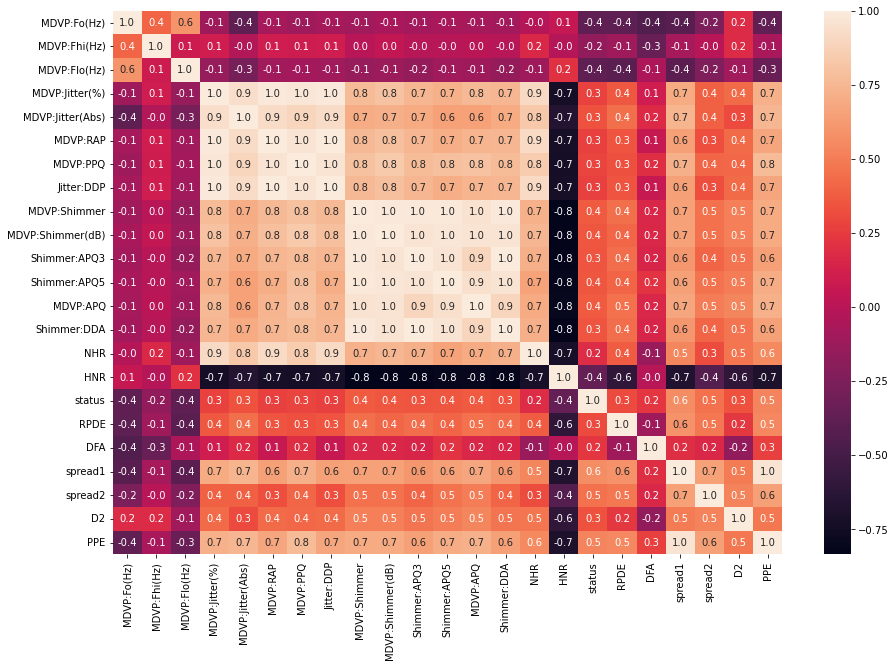

In [6]:
# plotting correlation heatmap
plt.figure(figsize = (15,10))
dataplot = sns.heatmap(df.corr(), annot=True, fmt='.1f')
plt.show()